In [2]:
"""
Distribution of causality scores by tissue
Top 5 causal loci per tissue

"""
# Set up
%pylab inline
# Libraries
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
#
COLORS = {
    "Artery-Aorta":"salmon",
    "Artery-Tibial": "red",
    "Adipose-Subcutaneous": "darkorange",    
    "Adipose-Visceral":"orange",
    "Brain-Caudate":"lemonchiffon"   , 
    "Brain-Cerebellum":"yellow",
    "Cells-Transformedfibroblasts": "skyblue",
    "Esophagus-Mucosa": "sienna",
    "Esophagus-Muscularis":"burlywood",
    "Heart-LeftVentricle":"darkviolet",
    "Lung": "greenyellow",
    "Muscle-Skeletal": "mediumslateblue",
    "Nerve-Tibial":"gold",
    "Skin-NotSunExposed":"blue",
    "Skin-SunExposed":"cornflowerblue",
    "Thyroid":"green",
    "WholeBlood": "m",
    "permuted": "gray"
}

SHORTEN = {
    "Artery-Aorta":"Artery.A"     ,
    "Artery-Tibial": "Artery.T",
    "Adipose-Subcutaneous": "Adipose.S",    
    "Adipose-Visceral":"Adipose.V",
    "Brain-Caudate":"Caudate"   , 
    "Brain-Cerebellum":"Cerebellum",
    "Cells-Transformedfibroblasts": "Fibroblast",
    "Esophagus-Mucosa": "Mucosa",
    "Esophagus-Muscularis":"Muscularis",
    "Heart-LeftVentricle":"Heart",
    "Lung": "Lung",
    "Muscle-Skeletal": "Muscle",
    "Nerve-Tibial":"Nerve",
    "Skin-NotSunExposed": "SkinUnexposed",
    "Skin-SunExposed":"SkinLeg",
    "Thyroid":"Thyroid",
    "WholeBlood": "Blood"
}
TISSUES = [item for item in list(SHORTEN.keys())]
REGDIR = "/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/"

Populating the interactive namespace from numpy and matplotlib


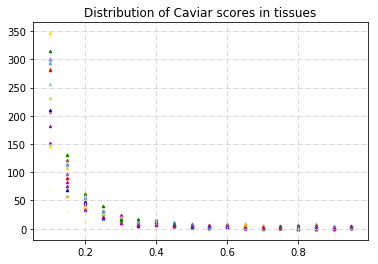

In [3]:
##Caviar distribution

for T in sorted(SHORTEN.keys()):
    #print(T)
    summary = pd.read_csv(REGDIR+T+'/Master.table', sep='\t')
    summary = summary.loc[summary['significant']==1].copy()
    L = list(summary['caviar.score'].astype(float))
    bin_values = np.arange(start=min(L), stop=max(L), step=0.05)
    count=[]
    for i in range(len(bin_values)-1):
        count.append(len([x for x in L if x>=bin_values[i] and x<bin_values[i+1]]))
    plt.scatter(bin_values[2:], count[1:], color=COLORS[T],label=T,s=6, marker='^')
    plt.grid(color='lightgrey', linestyle='--')
    plt.title("Distribution of Caviar scores in tissues")
   

plt.show()